In [1]:
import os
os.chdir('..')
from notebooks import config
import numpy as np
from utils.geotif_io import readTiff, writeTiff
from utils.imgShow import imgShow
from utils.metric import acc_matrix
import matplotlib.pyplot as plt


In [17]:
idx = '06'
path_as = config.root_proj + '/data/dset/s1_ascend/s1as_scene'+ idx + '.tif'
path_des = config.root_proj + '/data/dset/s1_descend/s1des_scene' + idx + '.tif'
path_wat = config.root_proj + '/data/dset/s1_water_test/s1_scene' + idx + '_water.tif'


In [18]:
s1_as, s1_as_info = readTiff(path_as)
s1_des, s1_des_info = readTiff(path_des)
s1_water, s1_water_info = readTiff(path_wat)
scene = np.concatenate((s1_as, s1_des), axis=-1)


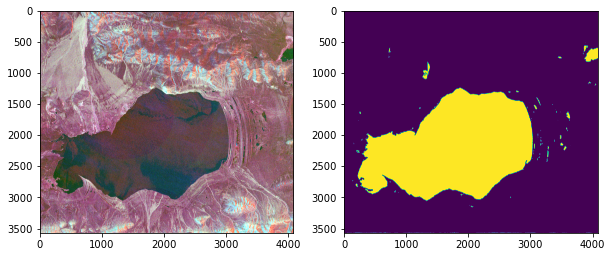

In [19]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
imgShow(scene, clip_percent=1, per_band_clip='True')
plt.subplot(1,2,2)
plt.imshow(s1_water)
